In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Fungsi untuk memisahkan training data dan testing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fungsi untuk memanggil model Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export, export_graphviz, plot_tree
from sklearn.cluster import KMeans

# Fungsi untuk melakukan normalisasi dan standardisasi data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Fungsi untuk menghitung evaluation metrics
from sklearn import metrics, datasets

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Dataset**

In [ ]:
data_bike = pd.read_csv('http://bit.ly/dwp-data-bike')

In [ ]:
data_bike.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender
0,261,2019-08-01 00:14:55.9900,2019-08-01 00:19:17.4780,JC Medical Center,Liberty Light Rail,26268,Subscriber,1980,1
1,172,2019-08-01 00:23:06.9910,2019-08-01 00:25:59.1480,Dixon Mills,Grove St PATH,26162,Subscriber,1996,1
2,525,2019-08-01 00:23:28.6170,2019-08-01 00:32:13.7000,Newport Pkwy,Hamilton Park,29279,Subscriber,1991,1
3,219,2019-08-01 00:32:36.1410,2019-08-01 00:36:15.2730,Warren St,City Hall,29598,Subscriber,1988,1
4,262,2019-08-01 00:41:26.6700,2019-08-01 00:45:49.3530,Grove St PATH,Jersey & 3rd,26162,Subscriber,1960,1


In [ ]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46230 entries, 0 to 46229
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tripduration        46230 non-null  int64 
 1   starttime           46230 non-null  object
 2   stoptime            46230 non-null  object
 3   start station name  46230 non-null  object
 4   end station name    46230 non-null  object
 5   bikeid              46230 non-null  int64 
 6   usertype            46230 non-null  object
 7   birth year          46230 non-null  int64 
 8   gender              46230 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


## **Data Analysis**

### **Data Analysis of Bike Sharing Rental** 

Berikut merupakan dataset bike sharing dengan total 46.230 rows x 16 columns. Dimana dataset ini menjelaskan mengenai sistem bike sharing yang menjadi sarana persewaan sepeda mulai dari mendapatkan keanggotaan, persewaan, waktu peminjaman dan pengembalian sepeda. Proses bisnis dilakukan secara otomatis melalui network of kiosk locations di seluruh kota. Dengan menggunakan sistem ini, orang dapat menyewa sepeda dari satu lokasi dan mengembalikannya ke tempat lain sesuai kebutuhan.

Data yang dihasilkan oleh sistem ini menarik untuk diteliti dan dianalisis, dengan menjawab pertanyaan yang ada dan kemudian mengambil insight dari proses analisis yang dilakukan. Sebab attribute dalam data seperti durasi perjalanan, lokasi keberangkatan, lokasi kedatangan, dan waktu yang telah berlalu dicatat secara eksplisit dan dapat digunakan untuk mempelajari mobilitas di kota.

## **Question**

1. Kelompok umur dan gender apa saja yang paling banyak menggunakan Citybike rental?
2. Berapa total trip (peminjaman sepeda) pada setiap hari (Senin - Minggu) dan waktu (hour) nya? 
3. Hari (Senin - Minggu) apa yang memiliki peminjaman sepeda paling banyak terjadi? 
4. 5 Stasiun keberangkatan favorit dan waktu (hour) dengan peminjaman sepeda paling favorit
5. Apakah semakin tua umur seseorang (age) mempengaruhi lama waktunya peminjaman sepeda (trip duration by minute)?

## **Wrangle**

In [ ]:
# Mengganti kolom starttime menjadi tipe data datetime
data_bike['starttime'] = pd.to_datetime(data_bike['starttime'])

# Mengekstrak value yang diinginkan (hari) menggunakan .dt.strftime('')
data_bike['dayname'] = data_bike['starttime'].dt.strftime('%A')

# Menganti tipe data dayname menjadi categorical
data_bike['dayname'] = pd.Categorical(data_bike['dayname'],
                                    ordered=True,
                                    categories=['Monday',
                                               'Tuesday',
                                               'Wednesday',
                                               'Thursday',
                                               'Friday',
                                               'Saturday',
                                               'Sunday'])

In [ ]:
# Menambahkan kolom Hour
data_bike['hour'] = data_bike['starttime'].dt.strftime('%I %p')

In [ ]:
# Menambah kolom umur
data_bike['age'] = 2020 - data_bike['birth year']

In [ ]:
# Menambahkan kolom route {start station name - end station name}
# functionnya
def add_route(row):
    return row['start station name'] + ' - ' + row['end station name']

# Apply functionnya
data_bike['route'] = data_bike.apply(add_route, axis=1)

data_bike[['tripduration', 'start station name', 'end station name', 'route']]

,tripduration,start station name,end station name,route
0,261,JC Medical Center,Liberty Light Rail,JC Medical Center - Liberty Light Rail
1,172,Dixon Mills,Grove St PATH,Dixon Mills - Grove St PATH
2,525,Newport Pkwy,Hamilton Park,Newport Pkwy - Hamilton Park
3,219,Warren St,City Hall,Warren St - City Hall
4,262,Grove St PATH,Jersey & 3rd,Grove St PATH - Jersey & 3rd
...,...,...,...,...
46225,384,Harborside,Hamilton Park,Harborside - Hamilton Park
46226,633,Grove St PATH,City Hall,Grove St PATH - City Hall
46227,324,Marin Light Rail,Newark Ave,Marin Light Rail - Newark Ave
46228,126,Newark Ave,Brunswick St,Newark Ave - Brunswick St


In [ ]:
# Pengelompokan generasi berdasarkan umur
data_bike['age_category'] = data_bike['age']

# Membuat functionnya untuk memetakan data generasi berdasarkan pengelompokan umur
def convert_age_category(row):
    if row['age'] <= 25:
        return 'Gen Z'
    elif row['age'] <= 39:
        return 'Milenial'
    elif row['age'] <= 55:
        return 'Gen X'
    elif row['age'] <= 74:
        return 'Baby Boomers'
    elif row['age'] <= 98:
        return 'Tradisional'
    else:
        return 'unknown'

# Apply function

data_bike['kategori_umur'] = data_bike.apply(convert_age_category, axis=1)

In [ ]:
# Menambahkan kolom duration by minute
data_bike['tripduration_by_minute'] = round(data_bike['tripduration'] / 60)

In [ ]:
data_bike.head(5)

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,dayname,hour,age,route,age_category,kategori_umur,tripduration_by_minute
0,261,2019-08-01 00:14:55.990,2019-08-01 00:19:17.4780,JC Medical Center,Liberty Light Rail,26268,Subscriber,1980,1,Thursday,12 AM,40,JC Medical Center - Liberty Light Rail,40,Gen X,4.0
1,172,2019-08-01 00:23:06.991,2019-08-01 00:25:59.1480,Dixon Mills,Grove St PATH,26162,Subscriber,1996,1,Thursday,12 AM,24,Dixon Mills - Grove St PATH,24,Gen Z,3.0
2,525,2019-08-01 00:23:28.617,2019-08-01 00:32:13.7000,Newport Pkwy,Hamilton Park,29279,Subscriber,1991,1,Thursday,12 AM,29,Newport Pkwy - Hamilton Park,29,Milenial,9.0
3,219,2019-08-01 00:32:36.141,2019-08-01 00:36:15.2730,Warren St,City Hall,29598,Subscriber,1988,1,Thursday,12 AM,32,Warren St - City Hall,32,Milenial,4.0
4,262,2019-08-01 00:41:26.670,2019-08-01 00:45:49.3530,Grove St PATH,Jersey & 3rd,26162,Subscriber,1960,1,Thursday,12 AM,60,Grove St PATH - Jersey & 3rd,60,Baby Boomers,4.0


In [ ]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46230 entries, 0 to 46229
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tripduration            46230 non-null  int64         
 1   starttime               46230 non-null  datetime64[ns]
 2   stoptime                46230 non-null  object        
 3   start station name      46230 non-null  object        
 4   end station name        46230 non-null  object        
 5   bikeid                  46230 non-null  int64         
 6   usertype                46230 non-null  object        
 7   birth year              46230 non-null  int64         
 8   gender                  46230 non-null  int64         
 9   dayname                 46230 non-null  category      
 10  hour                    46230 non-null  object        
 11  age                     46230 non-null  int64         
 12  route                   46230 non-null  object

## **Explore**

#### 1. Kelompok umur dan gender apa saja yang paling banyak menggunakan Citybike rental?

In [ ]:
users = data_bike.groupby(['age','gender','kategori_umur'], as_index=False)['bikeid'].count() \
                 .rename(columns={'bikeid': 'total'}) \
                 .sort_values('total', ascending=False) \
                 .head()

# users

,age,gender,kategori_umur,total
91,51,0,Gen X,2961
40,32,1,Milenial,1868
37,31,1,Milenial,1780
43,33,1,Milenial,1622
46,34,1,Milenial,1618


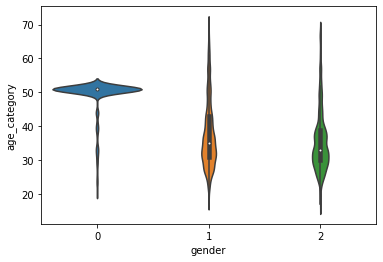

In [ ]:
# Visualisasi menggunakan seaborn
sns.violinplot(data=data_bike, x='gender', y='age_category')
plt.show()

#### 2.) Berapa total trip (peminjaman sepeda) pada setiap hari (Senin - Minggu) dan waktu (hour) nya?

In [ ]:
total_by_dayhour = data_bike.groupby(['dayname','hour'], as_index=False)['gender'].count() \
                            .rename(columns={'gender': 'total'}) \
                            .sort_values('total', ascending=False) \
                            .head()

total_by_dayhour

,dayname,hour,total
86,Thursday,08 AM,1147
83,Thursday,06 PM,1037
110,Friday,08 AM,950
38,Tuesday,08 AM,924
81,Thursday,05 PM,892


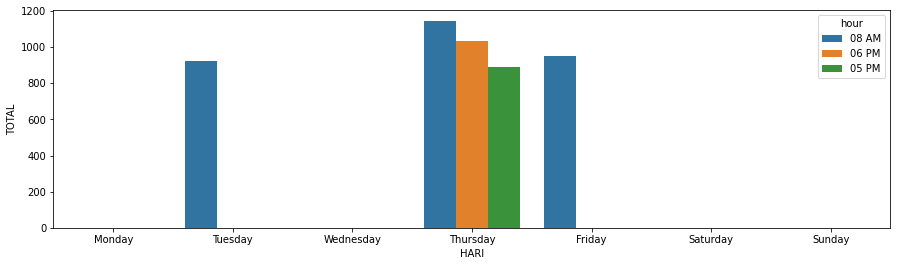

In [ ]:
# Mengatur height x width visualisasi
plt.figure(figsize=(15,4))

# Visualisasi menggunakan seaborn
sns.barplot(data=total_by_dayhour, x='dayname', y='total', hue='hour')

plt.ylabel('TOTAL')
plt.xlabel('HARI')

plt.show()

#### 3. Hari (Senin - Minggu) apa yang memiliki peminjaman sepeda paling banyak terjadi?

In [ ]:
data_bike['dayname'] = data_bike['starttime'].dt.strftime('%A')

total_by_day = data_bike.groupby('dayname', as_index=False)['gender'].count() \
                        .rename(columns={'gender': 'total'}) \
                        .sort_values('total', ascending=False)

total_by_day

,dayname,total
4,Thursday,8470
0,Friday,8100
5,Tuesday,6627
1,Monday,6377
2,Saturday,6258
6,Wednesday,5958
3,Sunday,4440


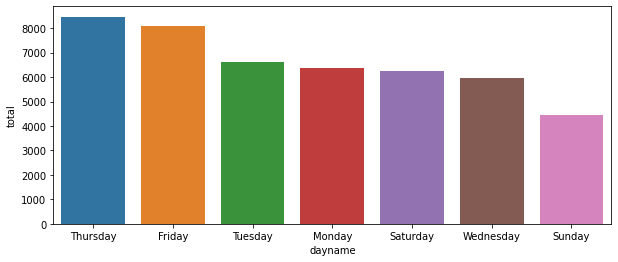

In [ ]:
# Mengatur height x width visualisasi
plt.figure(figsize=(10,4))

# Visualisasi menggunakan seaborn
sns.barplot(data=total_by_day, x='dayname', y='total')
plt.show()

#### 4. 5 Stasiun keberangkatan favorit dan waktu (hour) dengan peminjaman sepeda paling favorit

In [ ]:
total_by_station_hour = data_bike.groupby(['start station name','hour'], as_index=False)['bikeid'].count() \
                                 .rename(columns={'bikeid': 'total'}) \
                                 .sort_values('total', ascending=False) \
                                 .head(10)

total_by_station_hour

,start station name,hour,total
384,Grove St PATH,06 PM,1113
382,Grove St PATH,05 PM,883
410,Hamilton Park,08 AM,744
386,Grove St PATH,07 PM,669
388,Grove St PATH,08 PM,423
183,Columbus Dr at Exchange Pl,05 PM,417
1011,Sip Ave,06 PM,377
380,Grove St PATH,04 PM,331
877,Newport PATH,05 PM,320
429,Harborside,05 PM,316


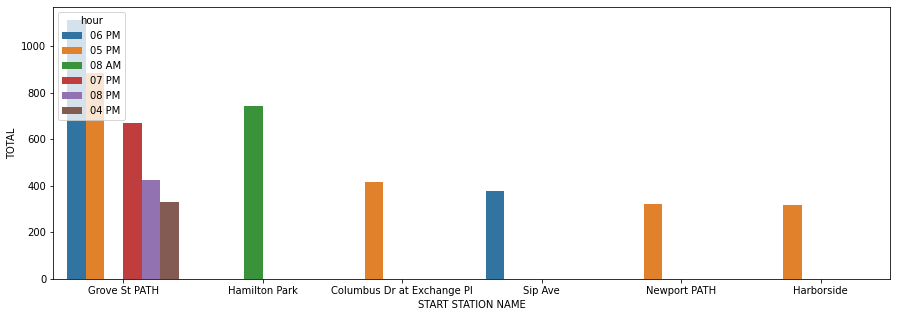

In [ ]:
# Mengatur height x width visualisasi
plt.figure(figsize=(15,5))

# Visualisasi menggunakan seaborn
sns.barplot(data=total_by_station_hour, x='start station name', y='total', hue='hour')

plt.ylabel('TOTAL')
plt.xlabel('START STATION NAME')

plt.show()

#### 6. Apakah semakin tua umur seseorang (age) mempengaruhi lama waktunya peminjaman sepeda (trip duration by minute)?

In [ ]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46230 entries, 0 to 46229
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tripduration            46230 non-null  int64         
 1   starttime               46230 non-null  datetime64[ns]
 2   stoptime                46230 non-null  object        
 3   start station name      46230 non-null  object        
 4   end station name        46230 non-null  object        
 5   bikeid                  46230 non-null  int64         
 6   usertype                46230 non-null  object        
 7   birth year              46230 non-null  int64         
 8   gender                  46230 non-null  int64         
 9   dayname                 46230 non-null  category      
 10  hour                    46230 non-null  object        
 11  age                     46230 non-null  int64         
 12  route                   46230 non-null  object

In [ ]:
# 6.1 Memecah data training dan data testing / Split training data and testing data

In [ ]:
x = data_bike[['age_category']]
y = data_bike['tripduration']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# 6.2 Fitting Metode Regresi Linear
# 6.2.1 Initiate the model
model = LinearRegression()

# 6.2.2 Training process
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 6.3 Testing and evaluation process
y_pred = model.predict(x_test)
error = metrics.mean_absolute_error(y_test, y_pred)

print('MAE: {}'.format(error))

MAE: 268.5136277752999


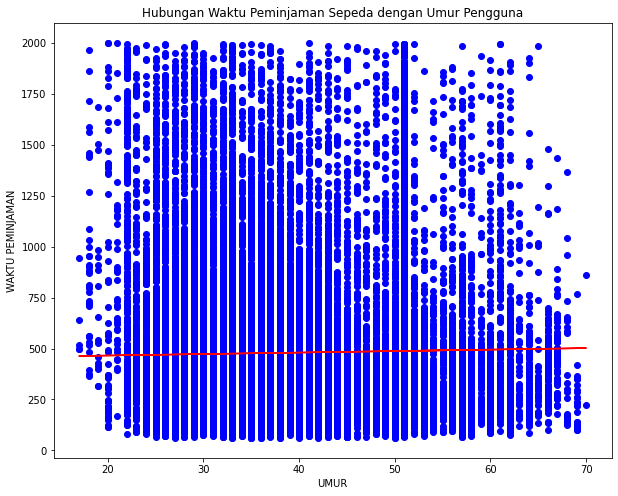

In [ ]:
# 6.4 Visualisasi Training Process
# 6.4.1 Mengatur height x width visualisasi
plt.figure(figsize=(10,8))

# 6.4.2 Visualisasi data menggunakan seaborn
# 6.4.2.1 Biru adalah data observasi
plt.scatter(x_train, y_train, color = 'blue')

# 6.4.2.2 Garis Merah adalah hasil prediksi dari machine learning
plt.plot(x_train, model.predict(x_train), color = 'red')

plt.ylabel('WAKTU PEMINJAMAN')
plt.xlabel('UMUR')
plt.title('Hubungan Waktu Peminjaman Sepeda dengan Umur Pengguna')

plt.show()

## **Conslusion**

1. Kelompok umur yang paling banyak menggunakan Citybike rental adalah **Gen X** dengan **rentang umur 40 - 55 tahun**. Dan **gender** yang paling banyak menggunakan Citybike rental tersebut adalah **Laki-laki**. <br>
<br>
2. Total peminjaman sepeda harian terbanyak adalah hari **Kamis (Thursday)** dengan total **3.076 transaksi** serta waktu peminjaman harian paling banyak pada hari ini adalah pukul **08 AM, 04 PM, dan 06 PM**. Kemudian di urutan kedua untuk total peminjaman sepeda harian terbanyak adalah hari **Jumat (Friday)** dengan total **950 transaksi** serta waktu peminjaman harian paling banyak pada hari ini adalah pukul **08 AM**. Terakhir, untuk total peminjaman sepeda harian terbanyak selanjutnya adalah hari **Selasa (Tuesday)** dengan total **924 transaksi** serta waktu peminjaman harian paling banyak pada hari ini adalah pukul **08 AM**. <br>
<br>
3. Hari yang memiliki peminjaman sepeda paling banyak adalah hari **Kamis (Thursday)** dengan total **8.470 transaksi**.<br>
<br>
4. **5 Stasiun keberangkatan favorit** untuk peminjaman sepeda dan **waktu favoritnya** adalah:
<br>i.) **Grove St PATH** dengan waktu favorit peminjaman sepeda adalah **05 AM, 06 AM, 07 PM dan 08 PM**.
<br>ii.) **Hamilton Park** dengan waktu favorit peminjaman sepeda adalah **08 AM**.
<br>iii.) **Columbus Dr at Exchange P1** dengan waktu favorit peminjaman sepeda adalah **5 PM**.
<br>iv.) **Sip Ave** dengan waktu favorit peminjaman sepeda adalah **06 PM**.
<br>v.) **Newport PATH** dengan waktu favorit peminjaman sepeda adalah **05 PM**.<br>
<br>
5. **Umur (age) pengguna tidaklah mempengaruhi lama waktu peminjaman sepeda (trip duration by minute)**, begitupun juga sebaliknya. Karena dari hasil **visualisasi** diatas **tidak memperlihatkan pola keterhubungan antara Umur Pengguna dengan Lama Waktu Peminjaman**. Walaupun nilai Mean Absolute Error (MAE) yang didapat dari model yang dibuat sebesar 4 menit dari nilai waktu data aslinya.
